In [1]:
# Solving a 1D diffusion equation with a fixed concentration 
# at the left boundary and a closed boundary on the right side

In [2]:
import matplotlib.pyplot as plt
import pyfvtool as pf

In [3]:
Nx = 20 # number of finite volume cells
Lx = 1.0 # [m] length of the domain 
c_left = 1.0 # left boundary concentration
c_init = 0.0 # initial concentration
D_val = 1e-5 # diffusion coefficient (gas phase)
t_simulation = 3600.0 # [s] simulation time
dt = 60.0 # [s] time step

In [4]:
m1 = pf.Grid1D(Nx, Lx) # mesh object

In [5]:
bc = pf.BoundaryConditions(m1) # zero-flux boundary condition by default

In [6]:
# switch the left boundary to Dirichlet: fixed concentration
bc.left.a[:] = 0.0
bc.left.b[:] = 1.0
bc.left.c[:] = c_left

In [7]:
# create a cell variable with initial concentration
c_old = pf.CellVariable(m1, c_init, bc)

In [8]:
# assign diffusivity to cells
D_cell = pf.CellVariable(m1, D_val)
D_face = pf.geometricMean(D_cell) # average value of diffusivity at the interfaces between cells

In [9]:
# Discretization
Mdiff = pf.diffusionTerm(D_face)
Mbc, RHSbc = pf.boundaryConditionsTerm(bc)

In [10]:
# time loop
t = 0
while t<t_simulation:
    t+=dt
    Mt, RHSt = pf.transientTerm(c_old, dt, 1.0)
    c_new = pf.solveMatrixPDE(m1, Mt-Mdiff+Mbc, RHSbc+RHSt)
    c_old.update_value(c_new)

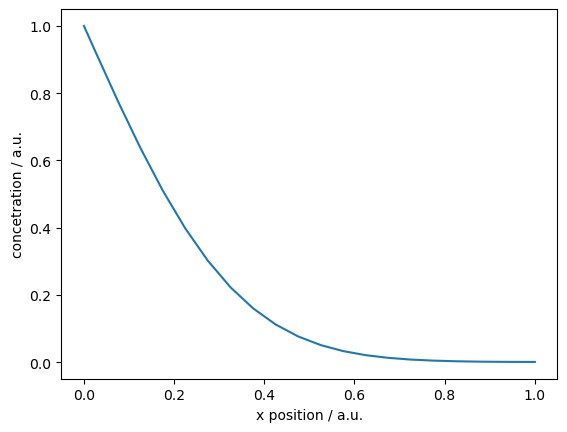

In [11]:
pf.visualizeCells(c_old)
plt.xlabel('x position / a.u.')
plt.ylabel('concetration / a.u.');